binary_string1 is:  01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001
binary values: is:  ['01001000', '01100101', '01101100', '01101100', '01101111', '00101100', '00100000', '01010111', '01101111', '01110010', '01101100', '01100100', '00100001']
converted_string_1 is: Hello, World!
binary_converted_1 is: 01001000011001010110110001101100011011110010110000100000010101110110111101110010011011000110010000100001001011000010000001001000011001010110110001101100011011110010110000100000010101110110111101110010011011000110010000100001001011000010000001001000011001010110110001101100011011110010110000100000010101110110111101110010011011000110010000100001
<class 'str'>
Length of binary_converted_1 is:  344
binary_converted_1_int_list is:  [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 

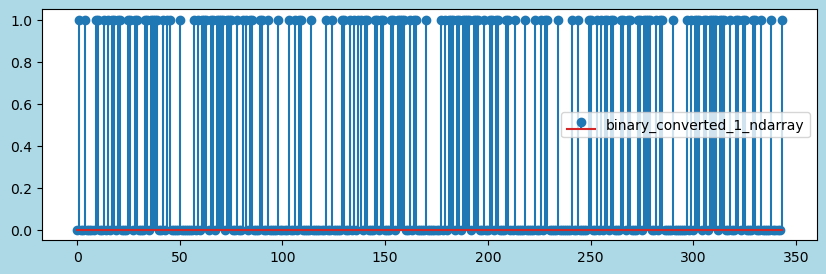

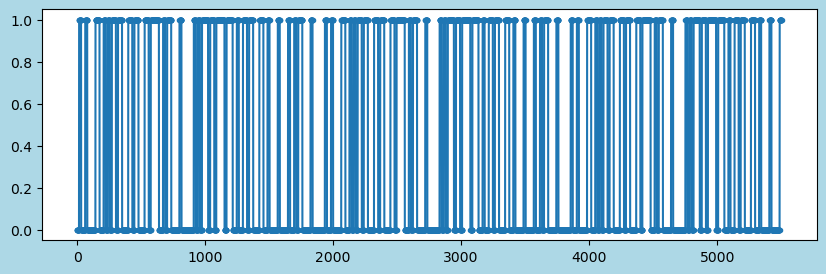

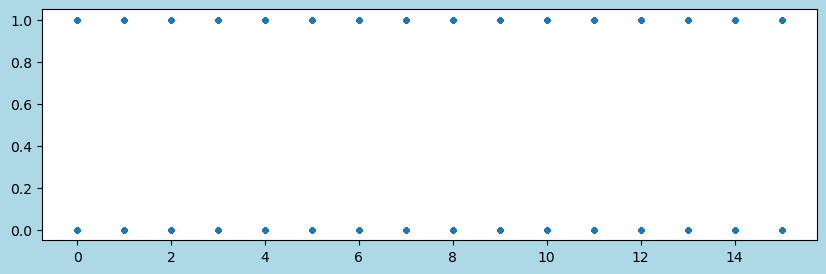

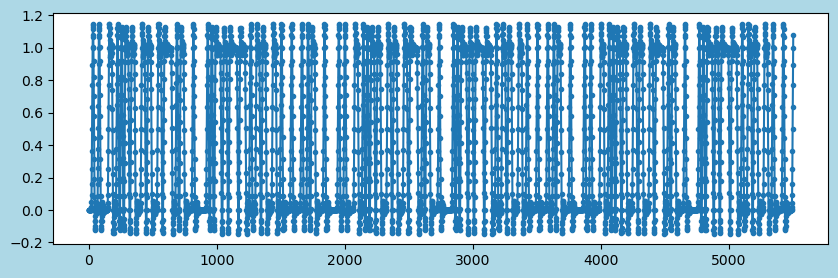

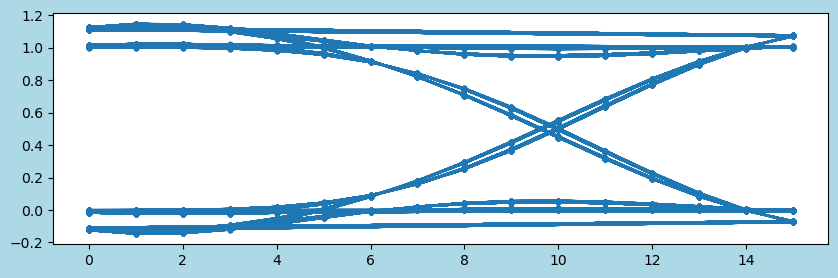

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def binary_to_string(binary_string):
    
    # Split the binary string into individual binary codes
    binary_values = binary_string.split()
    print('binary values: is: ',binary_values)
    # Convert each binary code to the corresponding character
    ascii_characters = [chr(int(b, 2)) for b in binary_values]
    # Join the characters to form the original string
    converted_string = ''.join(ascii_characters)
    return converted_string

# Example usage
binary_string1 = "01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001"
print('binary_string1 is: ', binary_string1)

converted_string_1 = binary_to_string(binary_string1)
print(f"converted_string_1 is: {converted_string_1}")

input_string_1 = "Hello, World!, Hello, World!, Hello, World!"

binary_converted_1 = ''.join(format(ord(char), '08b') for char in input_string_1)
#binary_converted_1 = "".join(f"{ord(i):08b}" for i in input_string_1)

print("binary_converted_1 is:", binary_converted_1)
print(type(binary_converted_1))

lengthofbinary_converted_1 = len(binary_converted_1)
print('Length of binary_converted_1 is: ', lengthofbinary_converted_1)

binary_converted_1_int_list = [int(i) for i in binary_converted_1]
print('binary_converted_1_int_list is: ', binary_converted_1_int_list)
print(type(binary_converted_1_int_list))

#Conver tList to ndarray
binary_converted_1_ndarray = np.array(binary_converted_1_int_list)
print('binary_converted_1_ndarray is:', binary_converted_1_ndarray)
print(type(binary_converted_1_ndarray))

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.stem(binary_converted_1_ndarray, ".-", label = 'binary_converted_1_ndarray')
ax1_1.legend()

#Create time col

samplerate = 2 ** 4
numberofpointspersymbol = 2 ** 0
repetitions1 = samplerate / numberofpointspersymbol
print('repetitions1 is: ', repetitions1)

array = np.tile(np.arange(0, repetitions1), lengthofbinary_converted_1)#[:1000]
print('Size of filtered_gaussian is: ', array.size)

# Convert Symbol to analog signal using 'repeat' function

TX_analog_values1 = np.repeat(binary_converted_1_ndarray, repetitions1)
#print('TX_analog_values1 is: ', TX_analog_values1)
print('Size of TX Analog values 1 is: ', TX_analog_values1.size)

print(type(TX_analog_values1))

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(TX_analog_values1, ".-")

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(array, TX_analog_values1, ".")

#Butter Filter
order = 6
normal_cutoff = 0.125 # 0 to 1

b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

data1_butter_filtered = signal.lfilter(b, a, TX_analog_values1) # scipy.signal.lfilter
#print(data1_butter_filtered)

#print('Size of filtered_gaussian is: ', sys.getsizeof(data1_butter_filtered))
print('Size of filtered_gaussian is: ', data1_butter_filtered.size)

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(data1_butter_filtered, ".-")

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(array, data1_butter_filtered, ".-")

#splitarray1 = np.hsplit(TX_analog_values1, lengthofbinary_converted_1) # As is
splitarray1 = np.hsplit(data1_butter_filtered, lengthofbinary_converted_1) # filtered

#print('splitarray1 is: ', splitarray1)
print(type(splitarray1))
print('Size of splitarray1 is: ', sys.getsizeof(type(splitarray1)))

mean_ndarray1 = np.ones(lengthofbinary_converted_1)
#print('mean_ndarray1 is: ',mean_ndarray1)

for ii in range(lengthofbinary_converted_1):
    #print(splitarray1[ii])
    mean_ndarray1[ii] = round(np.mean(splitarray1[ii]))

print('mean_ndarray1 is: ',mean_ndarray1)
print(type(mean_ndarray1))

list_afterconvolution = mean_ndarray1.tolist()
list_afterconvolution_cleaned = list(map(int, list_afterconvolution))

print(list_afterconvolution_cleaned)
print(type(list_afterconvolution_cleaned))

string1_afterconvolution = ''.join(str(x) for x in list_afterconvolution_cleaned)

print('string1_afterconvolution is : ', string1_afterconvolution)
print(type(string1_afterconvolution))


def splitAt(w,n):
    for i in range(0,len(w),n):
        yield w[i:i+n]

string1_afterconvolution_spaceadded = " ".join(splitAt(string1_afterconvolution,8))

print(string1_afterconvolution_spaceadded)

regenerated_string_2 = binary_to_string(string1_afterconvolution_spaceadded)
print('The regenerated_string_1 is: ', regenerated_string_2)
